<a href="https://colab.research.google.com/github/mohamedalifaragitiai/Computer-Vision-Practical/blob/main/LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,AveragePooling2D,Conv2D
from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(train_x,train_y),(test_x,test_y)=mnist.load_data()

train_x=np.reshape(train_x,(-1,28,28,1))
print("train_x.shape:{}".format(train_x.shape))
train_y=np_utils.to_categorical(train_y,10)
print("train_y.shape:{}".format(train_y.shape))

test_x=np.reshape(test_x,(-1,28,28,1))
print("test_x.shape:{}".format(test_x.shape))
test_y=np_utils.to_categorical(test_y,10)
print("test_y.shape:{}".format(test_y.shape))

11490434/11490434 [==============================] - 0s 0us/step
train_x.shape:(60000, 28, 28, 1)
train_y.shape:(60000, 10)
test_x.shape:(10000, 28, 28, 1)
test_y.shape:(10000, 10)


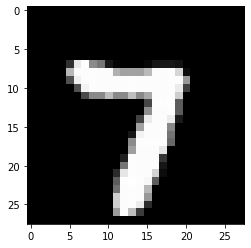

In [3]:
index = np.random.randint(0, len(train_x))
image = train_x[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")

In [4]:
model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu', input_shape = (28,28,1)))

model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding='valid', strides=(1, 1), activation ='relu'))

model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation = "relu"))

model.add(Dense(84, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Output model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [6]:
model.fit(train_x,train_y,
           batch_size=64,
           epochs=3,
           verbose=1,
           validation_data=(test_x,test_y))

Epoch 1/3
938/938 [==============================] - 43s 44ms/step - loss: 0.4190 - accuracy: 0.9235 - val_loss: 0.0736 - val_accuracy: 0.9774
Epoch 2/3
938/938 [==============================] - 40s 43ms/step - loss: 0.0771 - accuracy: 0.9766 - val_loss: 0.0572 - val_accuracy: 0.9812
Epoch 3/3
938/938 [==============================] - 40s 43ms/step - loss: 0.0543 - accuracy: 0.9831 - val_loss: 0.0670 - val_accuracy: 0.9790


In [7]:
score = model.evaluate(test_x, test_y, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0670 - accuracy: 0.9790
Val loss: 0.06704504042863846
Val accuracy: 0.9789999723434448
